# 最小二乘法

In [1]:
A = [2 0; -1 1; 0 2]

3×2 Array{Int64,2}:
  2  0
 -1  1
  0  2

In [2]:
b = [1, 0, -1]

3-element Array{Int64,1}:
  1
  0
 -1

In [3]:
xhat = [1/3, -1/3]

2-element Array{Float64,1}:
  0.3333333333333333
 -0.3333333333333333

In [4]:
rhat = A * xhat - b

3-element Array{Float64,1}:
 -0.33333333333333337
 -0.6666666666666666 
  0.33333333333333337

In [6]:
using LinearAlgebra
norm(rhat)

0.816496580927726

In [9]:
x = [1/2, -1/2]

2-element Array{Float64,1}:
  0.5
 -0.5

In [10]:
r = A * x - b

3-element Array{Float64,1}:
  0.0
 -1.0
  0.0

In [11]:
norm(r)

1.0

# 最小二乘法求解

$\hat x = (A^{T}A)^{-1}A^{T}b$

In [12]:
A

3×2 Array{Int64,2}:
  2  0
 -1  1
  0  2

In [13]:
inv(A' * A) * A' * b

2-element Array{Float64,1}:
  0.33333333333333337
 -0.33333333333333337

In [14]:
pinv(A) * b

2-element Array{Float64,1}:
  0.33333333333333326
 -0.3333333333333335 

In [15]:
(A' * A) * xhat - A'* b

2-element Array{Float64,1}:
 -2.220446049250313e-16
  2.220446049250313e-16

# 求解

xhat = A \ b

In [17]:
A = randn(100, 20); b = randn(100);

In [18]:
x1 = A \ b;

In [21]:
x2 = inv(A' * A) * (A' * b);

In [22]:
x3 = pinv(A) * b;

In [23]:
Q, R = qr(A);
Q = Matrix(Q);
x4 = R \ (Q' * b);

In [24]:
norm(x1 - x2)

3.9517061703634504e-16

In [25]:
norm(x2 - x3)

9.42395613282052e-16

In [26]:
norm(x3 - x4)

8.761663086152779e-16

In [28]:
R = [ 0.97  1.86  0.41;
             1.23  2.18  0.53;
             0.80  1.24  0.62;
             1.29  0.98  0.51;
             1.10  1.23  0.69;
             0.67  0.34  0.54;
             0.87  0.26  0.62;
             1.10  0.16  0.48;
             1.92  0.22  0.71;
             1.29  0.12  0.62];

In [29]:
m, n = size(R)

(10, 3)

In [31]:
vdes = 1e3 * ones(m);

In [32]:
s = R \ vdes

3-element Array{Float64,1}:
   62.07662454385133
   99.98500402826208
 1442.8374625412218 

In [34]:
using VMLS
rms(R * s - vdes)

132.63819026326527

# 数据拟合

In [35]:
vmt = vehicle_miles_data();

In [36]:
 m = 15*12;

In [37]:
A = [ 0:(m-1) vcat([eye(12) for i=1:15]...) ];

In [38]:
b = reshape(vmt', m, 1);

In [39]:
x = A \ b;

In [40]:
using Plots

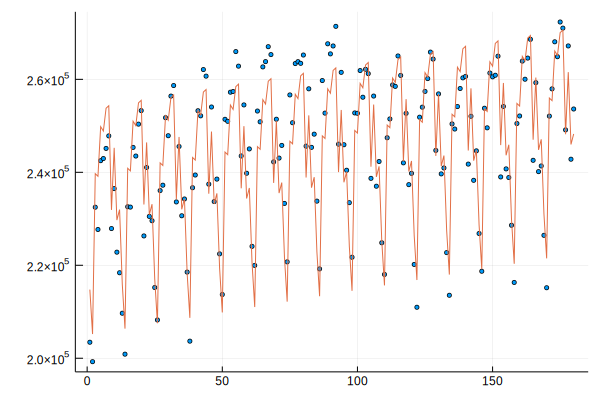

In [41]:
scatter(1:m, b, markersize = 2, legend =false);
plot!(1:m, A*x)